# Soccer Mining League
## Predict result one league and one season

#### Data Mining PESC/COPPE/UFRJ
#### Required: Python 3.5, Numpy, Scikit-Learn, Matplotlib

In [45]:
import numpy as np

#Sklearn -- preprocessing 
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#Plots
%matplotlib inline

from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.cross_validation import cross_val_score

#Sklearn -- Metrics
from sklearn.metrics import accuracy_score, confusion_matrix

# Soccer Mining League Functions
from functions import *

## Reading dataset

#### Reading from file

In [46]:
season1 = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2014_2015_formated.csv",delimiter=",")
season2 = np.loadtxt("../dataset/formated_files/matchs_teams_players_germany_league_2015_2016_formated.csv",delimiter=",")

#### Recover output

In [47]:
outputsSeason1 = season1[:,907]
outputsRSeason1 = season1[:,[908,909]]

outputsSeason2 = season2[:,907]
outputsRSeason2 = season2[:,[908,909]]


## Preprocessing

#### Maximize sparse teams

In [48]:
enc = preprocessing.OneHotEncoder()
enc.fit(season2[:,[0]])
teamsH = enc.transform(np.concatenate((season1[:,[0]],season2[:,[0]]),axis=0)) 
teamsA = enc.transform(np.concatenate((season1[:,[1]],season2[:,[1]]),axis=0)) 
teams = (teamsH + teamsA).toarray()
teamsSeason1 = teams[range(len(season2[:,[0]]))]
teamsSeason2 = teams[range(len(season2[:,[0]]),2*len(season2[:,[0]]))]


### Preprocessing Season 1

#### Reducing Dimensionality for team ratings

In [61]:
homeRateTeam = season1[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = season1[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Reducing Dimensionality for players

In [62]:
xTatics = season1[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((season1[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]

#### Concatenate inputs

In [63]:
date = season1[:,[2]]
print(awayRateTeampreprocessed[:,1].size)
inputsSeason1 = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed,teamsSeason1,date), axis=1)

for playerRD in playersRD:
    inputsSeason1 = np.concatenate((inputsSeason1,playerRD), axis=1)


306


#### Scaling inputs

In [64]:
inputsSeason1 = StandardScaler().fit_transform(inputsSeason1)

inputsSeason1[1,:].size

229

## Preprocessing Season 2

#### Reducing Dimensionality for team ratings

In [65]:
homeRateTeam = season2[:,[47,48,49,50,51,52,53,54,55,56,57,58]]
awayRateTeam = season2[:,[59,60,61,62,63,64,65,66,67,68,69,70]]

pca = decomposition.PCA(n_components=6)
homeRateTeamPreprocessed = pca.fit_transform(homeRateTeam)

pca = decomposition.PCA(n_components=6)
awayRateTeampreprocessed = pca.fit_transform(awayRateTeam)

#### Reducing Dimensionality for players

In [66]:
xTatics = season2[:,[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46]]

playersRD = [decomposition.PCA(n_components=9).fit_transform(np.concatenate((season2[:,range(71+(pos*38),71+((pos+1)*38))],xTatics[:,[pos,pos+22]]),axis=1)) for pos in range(22)]

#### Maximize sparse teams

#### Concatenate inputs

In [67]:
date = season2[:,[2]]
inputsSeason2 = np.concatenate((homeRateTeamPreprocessed,awayRateTeampreprocessed,teamsSeason2,date), axis=1)

for playerRD in playersRD:
    inputsSeason2 = np.concatenate((inputsSeason2,playerRD), axis=1)


#### Scaling inputs

In [68]:
inputsSeason2 = StandardScaler().fit_transform(inputsSeason2)

## Classification 

#### Using KFold with Naive Bayes

0.421568627451


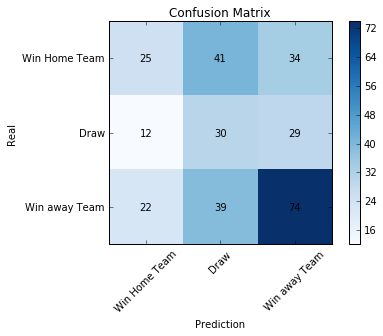

In [69]:
gnb = GaussianNB()
gnb.fit(inputsSeason1,outputsSeason1)
predicts = gnb.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

#### Using KFold with SVM 

0.450980392157


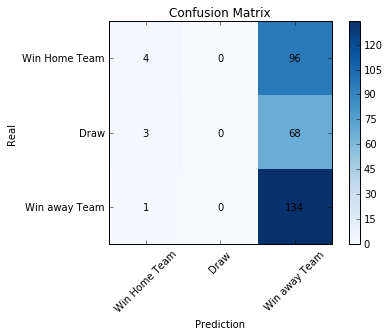

In [70]:
clf = svm.SVC()
clf.fit(inputsSeason1,outputsSeason1)
predicts = clf.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

#### Using KFold with Logistic Regression

0.333333333333


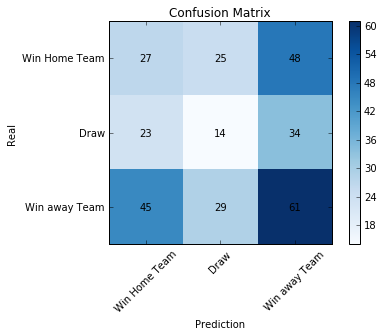

In [71]:
clf = LogisticRegression(penalty='l1')
clf.fit(inputsSeason1,outputsSeason1)
predicts = clf.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

#### Using KFold with KNeighborsClassifier

0.37908496732


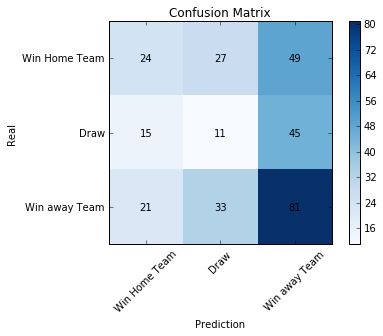

In [72]:
clf = KNeighborsClassifier(n_neighbors=15)
clf.fit(inputsSeason1,outputsSeason1)
predicts = clf.predict(inputsSeason2)
print(accuracy_score(outputsSeason2,predicts))
plotConfusionMatrix(outputsSeason2,predicts)

#### Using SVM - Regression for predict number of goals before predict winning team

In [18]:
#clf = svm.SVR()
#KFoldRC(clf,inputs,outputsR)